# Project 1 on machine learning
deadline: December 15, 2021


check the following site: 

- https://www.kaggle.com/bjoernjostein/linear-polynomial-fitting-of-franke-s-function/comments

## Regression analysis and resampling methods
Aim: to study in more details various regression methods, including the Ordinary Least Squares (OLS) method.
    

The Franke function, which is a weighted sum of four exponential read as 

$$
f(x,y) = \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4}-\frac{(9y-2)^2}{4}\right)} + \frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}-\frac{(9y+1)}{10}\right)} \\
+ \frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4}-\frac{(9y-3)^2}{4}\right)} - \frac{1}{5}\exp{\left(-(9x-4)^2-(9y-7)^2 \right)}
$$

The function will be defined for $x,y \in [0,1]$.

Things to do:
- Our first step will be to perform an OLS regression analysis of this function, trying out a polynomial fit with an x and y dependence of the form $[x,y,x^2,y^2,xy,...]$. 
- We will also include boostrap first as a resampling technique. 
- After that we will include the cross-validation technique. 

**Important things to note:**
- we can use a uniform distribution to set up the arrays of values x and y, or as in the example below just a set of fixed values for x and y with a given step size. 
- We will fit a function of x and y 
- Thereafter we will repeat much of the same procedure using the Ridge and Lasso regression methods, introducing thus a dependence on the bias (penalty) $\lambda$

x1 shape:  (20,)
y1 shape:  (20,)
shape of x:  20 20
shape of y:  20 20
shape of z: (20, 20)
shape of flat z: (400,)
(20, 20)


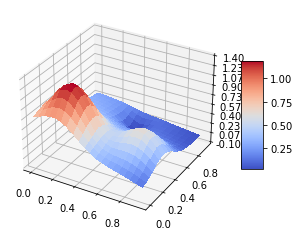

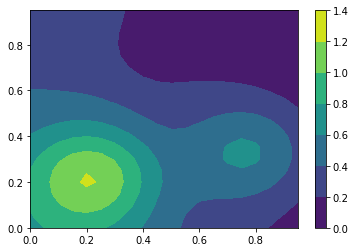

In [2]:
### Python code for the Franke function 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data. 
x1 = np.arange(0,1,0.05)
y1 = np.arange(0,1,0.05)

print('x1 shape: ',x1.shape)
print('y1 shape: ',y1.shape)
# Using numpy's meshgrid (why)
x, y = np.meshgrid(x1,y1)

print('shape of x: ',len(x),len(x))
print('shape of y: ',len(y),len(y))
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2)-0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-((9*x-7)**2)/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2-(9*y-7)**2)
    return term1+term2+term3+term4

z = FrankeFunction(x,y)
print('shape of z:',z.shape)
print('shape of flat z:',z.ravel().shape)

#z = FrankeFunction(x,y) + 0.05*np.random.normal(size=z.shape)
print(z.shape)
# Plot the surface 
surf = ax.plot_surface(x,y,z, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)

# Customize the z axis 
ax.set_zlim(-0.10,1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color basr which maps values to colors. 
fig.colorbar(surf,shrink=0.5, aspect=5)

plt.show()

plt.contourf(x,y,z)
plt.colorbar()
plt.show()

## Franke Function with Noise

For case where we add an stochastic noise to the Franke function: 

$$
f(x,y) = \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4}-\frac{(9y-2)^2}{4}\right)} + \frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}-\frac{(9y+1)}{10}\right)} \\
+ \frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4}-\frac{(9y-3)^2}{4}\right)} - \frac{1}{5}\exp{\left(-(9x-4)^2-(9y-7)^2 \right)} + N(0,1)
$$

x1 shape:  (20,)
y1 shape:  (20,)
shape of x:  20 20
shape of y:  20 20
(20, 20)


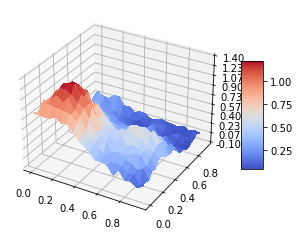

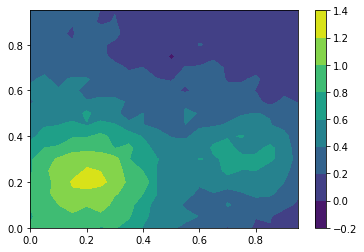

In [3]:
### Python code for the Franke function 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data. 
x1 = np.arange(0,1,0.05)
y1 = np.arange(0,1,0.05)

print('x1 shape: ',x1.shape)
print('y1 shape: ',y1.shape)
# Using numpy's meshgrid (why)
x, y = np.meshgrid(x1,y1)

print('shape of x: ',len(x),len(x))
print('shape of y: ',len(y),len(y))
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2)-0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-((9*x-7)**2)/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2-(9*y-7)**2)
    return term1+term2+term3+term4


z = FrankeFunction(x,y) + 0.05*np.random.normal(size=z.shape)
print(z.shape)

# Plot the surface 
surf = ax.plot_surface(x,y,z, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)

# Customize the z axis 
ax.set_zlim(-0.10,1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color basr which maps values to colors. 
fig.colorbar(surf,shrink=0.5, aspect=5)

plt.show()

plt.contourf(x,y,z)
plt.colorbar()
plt.show()

# Exercise 1: Ordinary Least Square (OLS) on the Franke function (10 points)
- Franke function + stochastic noise (normal distribution)
- write your own code (using either a matrix inversion or a singular value decomposition from e.g. numpy) and perform a standard least square regression analysis using polynomials in x and y up to fifth order
    - find the confidence intervals of the parameters (estimators) $\beta$ by computing their variances, evaluate the Mean Squared error (MSE) and the $R^2$ score function. 
- scale your data
- split the data into training and test data
    - you can use the splitting function provided by scikit learn
    - rule of thumb: 2/3 or 4/5 of the data should be training data

What is the fifth order of x and y?

What is degree of a polynomial is the highest of the degrees of the polynomial' monomial (individual terms) non-zero coefficients. The degree of a term is the sum of the exponents of the variables that appear in it, and thus is a non-negative integer. The term **order** has been used as synonym of degree. [wiki]

For example, the polynomial $7x^2y^3+4x-9$, which can also be written as $7x^2y^3 + 4x^1y^0 - 9x^0y^0$ has three terms. The first term has a degree of 5 (the sum of the powers 2 and 3). Therefore, the polynomial has a degree of 5, which is the highest degree of any term. [wiki]



The fifth order of x,y is: 

\begin{matrix}
x^0y^0 & x^0y^1 & x^0y^2 & x^0y^3 & x^0y^4 & x^0y^5\\
x^1y^0 & x^1y^1 & x^1y^2 & x^1y^3 & x^1y^4\\
x^2y^0 & x^2y^1 & x^2y^2 & x^2y^3 \\
x^3y^0 & x^3y^1 & x^3y^2 \\
x^4y^0 & x^4y^1 \\
x^5y^0\\
\end{matrix}

A total of 21 terms. 

$$
z(x,y) = x^0y^0 + x^0y^1 + x^0y^2 + x^0y^3 + x^0y^4 + x^0y^5 \\ 
   + x^1y^0 + x^1y^1 + x^1y^2 + x^1y^3 + x^1y^4\\
   + x^2y^0 + x^2y^1 + x^2y^2 + x^2y^3 \\
   + x^3y^0 + x^3y^1 + x^3y^2 \\
   + x^4y^0 + x^4y^1 \\
   x^5y^0
$$

# Design Matrix X  
X size = $(m \times  21)$


$$
\boldsymbol{X} = \begin{bmatrix}
x^0_1y^0_1 & x^0_1y^1_1 & x^0_1y^2_1 & x^0_1y^3_1 & x^0_1y^4_1 & x^0_1y^5_1 & x^1_1y^0_1 & x^1_1y^1_1 & x^1_1y^2_1 & x^1_1y^3_1 & x^1_1y^4_1
& ... & x^4_1y^0_1 & x^4_1y^1_1 &x^5_1y^0_1\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & ... & \vdots & \vdots & \vdots  \\
x^0_my^0_m & x^0_my^1_m & x^0_my^2_m & x^0_my^3_m & x^0_my^4_m & x^0_my^5_m & x^1_my^0_m & x^1_my^1_m & x^1_my^2_m & x^1_my^3_m & x^1_my^4_m
& ... & x^4_my^0_m & x^4_my^1 &x^5_my^0_m\\
\end{bmatrix}
$$

## Create the design matrix 

In [4]:
degree = 5
# create a list of possible tuple of fifth order power
power_list = [(i,j) for i in range(0,degree + 1) for j in range(0,degree + 1) if i+j <= degree]

#print(power_list)
print(len(power_list))

21


In [61]:
z.shape

(20, 20)

In [5]:
import numpy as np
X = np.zeros((len(x1),len(power_list)))
print('X shape: ',X.shape)
print('x1 shape',x1.shape)
for index, (x_pow, y_pow) in enumerate(power_list):
    X[:,index] = x1**(x_pow)*y1**(y_pow)

# m = 20 in this case

X shape:  (20, 21)
x1 shape (20,)


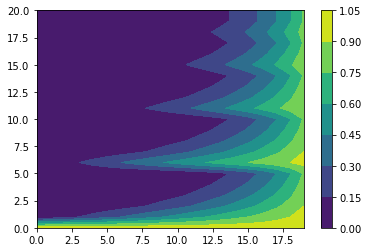

In [6]:
plt.contourf(X.T)
plt.colorbar()

Use this equation to calculate the estimator: 

$$
\widehat{\beta} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^Tz \\ 
\widehat{y} = \boldsymbol{X} \widehat{\beta}
$$

In [7]:
# Calculate beta using X 
print('\n')
# using the equation 
beta = np.linalg.pinv(X.T@X)@X.T@z

#print('Fitted beta:',beta)
zpredictOwn = X @ beta
MSE_own = np.sum((z-zpredictOwn)**2)/np.size(z)
print('own MSE:',MSE_own)



own MSE: 0.0021535616031583466


(20, 20)


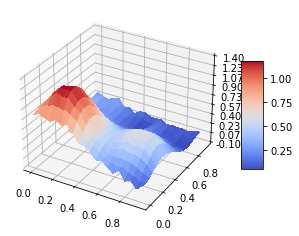

In [8]:
z_own = zpredictOwn
print(z_own.shape)
# Plot the surface
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x,y,z_own, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)

# Customize the z axis 
ax.set_zlim(-0.10,1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color basr which maps values to colors. 
fig.colorbar(surf,shrink=0.5, aspect=5)

plt.show()


## Scale your data
Scaling using standardization can improve performance

Scikit-learn has several functions which allow us to rescale the data, normally resulting in much better results in terms of various accuracy scores. 

- `StandardScaler` function in scikit-learn ensures that for each feature/predictor we study, the mean value is zero and the variance is one. 
- `MinMaxScaler` ensures that all features are exactly between 0 and 1
- `Normalizer` scale each data points such that the feature vector has a euclidean length of one, often used when only the direction (or angle) of the data matters, not the length of the feature vector 
- `RobustScaler` works with StandardScaler but uses median and quartiles instead of mean and variance. This makes it ignore data points that are very different from the rest (like measurement errors) 



For project 1, we use StandardScaler type using the following equation to scale the data: 
$$
x^{(i)}_{j} \rightarrow \frac{x^{(i)}_{j}-\bar{x}_j}{\sigma{x_j}}
$$

In [9]:
def own_standardscaler(X):
    return (X-np.mean(X,axis=0))/np.std(X,axis=0)

def skl_standardscaler(X):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(with_std=True)
    return scaler.fit(X).transform(X)
 

skl_scale = skl_standardscaler(X[:,1:])
own_scale = own_standardscaler(X[:,1:]) # problem: some elements are nan if intercept is included

X_scaled = skl_standardscaler(X)
X_scaled[:,0] = 1.0
#print(X_scaled)
#X_scaled.std(axis=0)



# test the correctness of the scaler
#skl_scale - own_scale

# each feature/predictor should have: std -> 1, mean -> 0

#own_scale.std(axis=0) 
#own_scale.mean(axis=0)
#skl_scale.std(axis=0)
#skl_scale.std(axis=0)

## Split the data into train and test data

In [10]:
from sklearn.model_selection import train_test_split
# split the scaled X into training and testing data
X_train, X_test, z_train, z_test = train_test_split(X_scaled,z,test_size=1/3, random_state = 2021)

# using the equation 
beta_ = np.linalg.pinv(X_train.T@X_train)@X_train.T@z_train
zpredictOwn_train = X_train @ beta_
MSE_own_train = np.sum((z_train-zpredictOwn_train)**2)/np.size(z_train)
print('own MSE train:',MSE_own_train)

own MSE train: 0.0013931980885064574


In [11]:
zpredictOwn_test = X_test @ beta_
MSE_own_test = np.sum((z_test-zpredictOwn_test)**2)/np.size(z_test)
print('own MSE test:',MSE_own_test)

own MSE test: 0.00908220090151785


# Resampling

Why resampling methods?

In our eager to fit the data, we have omitted several important elements in our regression analysis. In what follows we will

1. look at statistical properties, including a discussion of mean values, variance and the so-called bias-variance tradeoff
2. introduce resampling techniques like cross-validation, bootstrapping and jackknife and more 

and discuss how to select a given model (one of the difficult parts in machine learning). 

statistical reasons: 
1. our simulation can be treated as computer expirements - (e.g. monte carlo methods) 
   2 classes of errors: 
   - statistical errors - can be estimated using standard tools from statistics
   - systematic errors - systematic errors are method specific and must be treated differently from case to case 
2. results can be analyzed with the same statistical tools as we would use when analysing experimental data
3. as in all experiments, we are looking for expectation values and an estimate of how accurately they are, i.e., possible sources for errors 



## Resampling Methods
They involve repeatedly drawing samples from a training set and refitting a model of interest on each sample in order to obtain additional information about the fitted model. 

- in order to estimate the variability of a linear regression fit, we can repeatedly draw different samples from the training data, fit a linear regression to each new sample, and then examine the extent to which the resulting fits differ. 

Two resampling methods are often used in machine learning analyses: 
1. bootstrap method
2. cross-validation
    - can be used to estimate the test error associated with a given statistical learning method in order to evaluate its performance, or to select the appropriate level of flexibility


**Model assessment** - the process of evaluating a model's performance 

    How to asses a given model? 
    - this will lead to a discussion of the so-called bias-variance tradeoff and so called resampling methods 

**Model selection** - the process of selecting the proper level of flexibility for a model 


Note: 
- as our model becomes more and more complex, more of the training data to used. The training may thence adapt to morecomplicated structures in the data. This may lead to a decrease in the bias and a slight increase of the variance for the test error. For a certain level of complexity the test error will reach minimum, before starting to increase again. The training error reaches a saturation. 

### Resampling methods: Bootstrap 
Bootstrapping is a non-parametric approach to statistical inference that substitutes computation for more traditional
distributional assumptions and asymptotic results. Bootstrapping offers a number of advantages: 

1. it is quite general (but fails in some cases)
2. does not require distribution assumptions 
3. possible to apply it to statistics with sampling distributions that are difficult to derive
4. relatively simple to apply it to complex data-collection plans 





### Resampling methods: bootstrap steps
The independent bootstrap works like this: 
1. draw with replacement n numbers for the observed variables $\bf{x}$ = $(x_1,x_2,..,x_n)$
2. define a vector $\bf{x}^*$ containing the values which were drawn from $\bf{x}$
3. using the vector $\bf{x}^*$ compute $\widehat{\beta}^*$ by evaluating $\widehat{\beta}$ under the observations $\bf{x}^*$
4. repeat this process k times 



### The bias-variance tradeoff 
bias $ = \mathbb{E}\left[(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right] $ 

variance of the model $\tilde{y}$ $= \mathrm{Var}\left[\boldsymbol{\tilde{y}}\right]$

variance of $\epsilon$ = $\sigma^2$

In [12]:
def bootstrap_workflow(x_train,y_train,x_test,y_test,n_bootstrap):
    model = make_pipeline(PolynomialFeatures(degree),LinearRegression(fit_intercept=True))
    y_pred = np.empty((len(y_test),n_boostrap))
    for i in range(range(n_bootstrap)): 
        x_, y_ = resample(x_train,y_train)
        y_pred[:,i] = model.fit(x_,y_).predict(x_test).ravel()
    return y_pred

def bias_variance_error(y_pred,y_test):
    error = np.mean(np.mean((y_pred-y_test)**2,axis=1,keepdims=True))
    bias = np.mean((y_test-np.mean(y_pred,axis=1,keepdims=True))**2)
    variance = np.mean(np.var(y_pred,axis=1,keepdims=True))
    return bias, variance, error


In [13]:
# set the data
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pandas as pd
# split the scaled X into training and testing data
X_train, X_test, z_train, z_test = train_test_split(X_scaled,z,test_size=0.33, random_state = 2021)

print(z_test.shape)
n_bootstrap = 100
z_pred = np.empty((z_test.shape[0]*z_test.shape[1],n_bootstrap))

for i in range(n_bootstrap):
    X_, z_ = resample(X_train,z_train)
    beta_= np.linalg.pinv(X_.T@X_)@X_.T@z_
    z_pred[:,i] = (X_test @ beta_).ravel()


# Check if z prediction are the close to each other across a particular row 
df = pd.DataFrame(z_pred)
print(df.shape)
df.head()
#zpredictOwn_train = X_train @ beta_train
#MSE_own_test = np.sum((z_test.ravel()[:,np.newaxis]-z_pred)**2)/np.size(z_test)
#print('own MSE train:',MSE_own_test)

(7, 20)
(140, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.728685,1.196314,0.767929,0.878583,1.020966,0.824293,0.723960,1.060920,0.740356,0.499660,...,0.848876,0.750167,0.756342,0.867605,0.804889,1.194089,4.559209,1.041748,0.947750,0.757986
1,1.033647,1.233421,0.986852,1.209469,1.125421,1.034335,1.044317,0.653442,1.043272,0.907095,...,1.013588,1.046991,1.051414,1.050528,1.022642,1.283573,16.356551,0.874130,1.049899,1.054641
2,1.142170,1.456230,1.130797,0.231450,1.551210,1.324787,1.134634,3.046757,1.154346,1.001829,...,1.341534,1.159266,1.157961,1.261398,1.263976,1.710094,-10.915148,1.595690,1.332079,1.158099
3,1.135668,1.475359,1.078560,0.035973,1.368196,1.243092,1.130517,3.540631,1.128748,0.819011,...,1.165623,1.134000,1.154183,1.131164,1.118401,1.439566,16.729119,1.134749,1.276304,1.151943
4,1.138381,1.499136,1.283998,1.802940,1.635880,1.410690,1.144586,0.874762,1.168567,0.813108,...,1.336269,1.166582,1.173693,1.336454,1.340724,1.591267,29.335389,1.019327,1.322775,1.168236


In [14]:
# calculate the error, bias, and variance
bias, variance, error = bias_variance_error(z_pred,z_test.ravel().reshape(-1,1))
print(bias, variance, error)

# check the sum: error >= bias + variance 
error >= bias + variance

0.027971321574999826 3.0170029341479934 3.044974255722993


False

In [15]:
# Ridge Regression 
I = np.eye(X_train.shape[1],X_train.shape[1])
print(I.shape)
lmb = 0.001
beta_ridge = np.linalg.pinv(X_train.T @ X_train + lmb*I)@X_train.T @ z_train
z_predict_ridge = X_train @ beta_ridge
MSE_own_train = np.sum((z_train-z_predict_ridge)**2)/np.size(z_train)
print('own MSE train:',MSE_own_train)

(21, 21)
own MSE train: 0.0019190914680170088


# Common statistical calculation to determine the goodnes of the fit


In [16]:
def R2(y_data,y_model):
    return 1 - np.sum((y_data - y_model)**2)/np.sum((y_data - np.mean(y_data))**2)

def MSE(y_data, y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# Graph the prediction error vs complexity

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split

degree = 5
errors = []
mses = []
vars =[]
biass=[]

np.random.seed(2021)
for deg in range(0,degree):
    # STEP 1: create the design matrix X
    # create a list of possible tuple of fifth order power
    power_list = [(i,j) for i in range(0,degree + 1) for j in range(0,degree + 1) if i+j <= degree]
    X = np.zeros((len(x1),len(power_list)))
    for index, (x_pow, y_pow) in enumerate(power_list):
        X[:,index] = x1**(x_pow)*y1**(y_pow)

    # STEP 2: scale the data
    X_scaled = skl_standardscaler(X)

    # STEP 2.1 split the data  
    X_train, X_test, z_train, z_test = train_test_split(X_scaled,z,test_size=0.33)#, random_state = 2021)
    

    # STEP 3: use a sampling technique-> boostrap, cross-validation 
    n_bootstrap = 1000
    z_pred = np.empty((z_test.shape[0]*z_test.shape[1],n_bootstrap))

    for i in range(n_bootstrap):
        X_, z_ = resample(X_train,z_train)
        beta_= np.linalg.pinv(X_.T@X_)@X_.T@z_
        z_pred[:,i] = (X_test @ beta_).ravel()


    # STEP 4: statistics and figures 
    mse = MSE(z_test.ravel().reshape(-1,1),z_pred)
    bias, variance, error = bias_variance_error(z_pred,z_test.ravel().reshape(-1,1))
    #print(bias, variance, error)
    # check the sum: error >= bias + variance 
    # print(error >= bias + variance)
    errors += [error]
    mses += [mse]
    vars += [variance]
    biass += [bias]

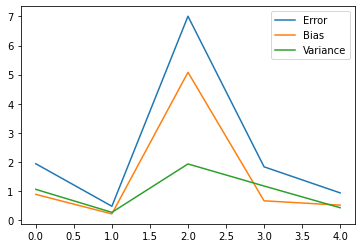

In [41]:
plt.plot(errors,label="Error")
#plt.plot(mses,label='MSE')
plt.plot(biass,label='Bias')
plt.plot(vars,label='Variance')
plt.legend()
plt.show()

# Test case if scaling comes after splitting

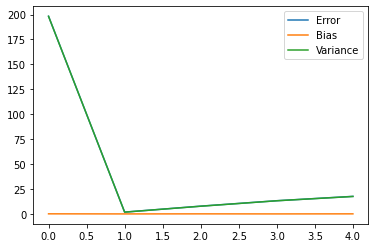

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split

degree = 5
errors = []
mses = []
vars =[]
biass=[]

np.random.seed(2021)
for deg in range(0,degree):
    # STEP 1: create the design matrix X
    # create a list of possible tuple of fifth order power
    power_list = [(i,j) for i in range(0,degree + 1) for j in range(0,degree + 1) if i+j <= degree]
    X = np.zeros((len(x1),len(power_list)))
    for index, (x_pow, y_pow) in enumerate(power_list):
        X[:,index] = x1**(x_pow)*y1**(y_pow)

   
    # STEP 2: split the data and scale it
    X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.33)#, random_state = 2021)
    X_train = skl_standardscaler(X_train)
    X_train[:,0] = 1
    X_test = skl_standardscaler(X_test)
    X_test[:,0] = 1
        
    # STEP 3: use a sampling technique-> boostrap, cross-validation 
    n_bootstrap = 1000
    z_pred = np.empty((z_test.shape[0]*z_test.shape[1],n_bootstrap))

    for i in range(n_bootstrap):
        X_, z_ = resample(X_train,z_train)
        beta_= np.linalg.pinv(X_.T@X_)@X_.T@z_
        z_pred[:,i] = (X_test @ beta_).ravel()


    # STEP 4: statistics and figures 
    mse = MSE(z_test.ravel().reshape(-1,1),z_pred)
    bias, variance, error = bias_variance_error(z_pred,z_test.ravel().reshape(-1,1))
    #print(bias, variance, error)
    # check the sum: error >= bias + variance 
    #print(error >= bias + variance)
    errors += [error]
    mses += [mse]
    vars += [variance]
    biass += [bias]

#df_test.head()

plt.plot(errors,label="Error")
plt.plot(biass,label='Bias')
plt.plot(vars,label='Variance')
plt.legend()
plt.show()

# OLS with cross-validation

train-indices:  [ 7  8  9 10 11 12 13 14 15 16 17 18 19]
test-indices:  [0 1 2 3 4 5 6]
train-indices:  [ 0  1  2  3  4  5  6 14 15 16 17 18 19]
test-indices:  [ 7  8  9 10 11 12 13]
train-indices:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
test-indices:  [14 15 16 17 18 19]
train-indices:  [ 7  8  9 10 11 12 13 14 15 16 17 18 19]
test-indices:  [0 1 2 3 4 5 6]
train-indices:  [ 0  1  2  3  4  5  6 14 15 16 17 18 19]
test-indices:  [ 7  8  9 10 11 12 13]
train-indices:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
test-indices:  [14 15 16 17 18 19]
train-indices:  [ 7  8  9 10 11 12 13 14 15 16 17 18 19]
test-indices:  [0 1 2 3 4 5 6]
train-indices:  [ 0  1  2  3  4  5  6 14 15 16 17 18 19]
test-indices:  [ 7  8  9 10 11 12 13]
train-indices:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
test-indices:  [14 15 16 17 18 19]
train-indices:  [ 7  8  9 10 11 12 13 14 15 16 17 18 19]
test-indices:  [0 1 2 3 4 5 6]
train-indices:  [ 0  1  2  3  4  5  6 14 15 16 17 18 19]
test-indices:  [ 7  8

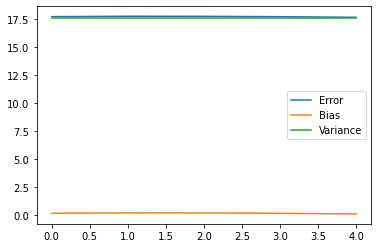

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

degree = 5
errors = []
mses = []
vars =[]
biass=[]

np.random.seed(2021)
for deg in range(0,degree):
    # STEP 1: create the design matrix X
    # create a list of possible tuple of fifth order power
    power_list = [(i,j) for i in range(0,degree + 1) for j in range(0,degree + 1) if i+j <= degree]
    X = np.zeros((len(x1),len(power_list)))
    for index, (x_pow, y_pow) in enumerate(power_list):
        X[:,index] = x1**(x_pow)*y1**(y_pow)

   
    # STEP 2: split the data and scale it
    X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.33)#, random_state = 2021)
    X_train = skl_standardscaler(X_train)
    X_train[:,0] = 1
    X_test = skl_standardscaler(X_test)
    X_test[:,0] = 1
        
    # STEP 3: use a sampling technique-> boostrap, cross-validation 
    k = 3
    kfold = KFold(n_splits=k)
    
    for train_inds, test_inds in kfold.split(X):
        print('train-indices: ',train_inds)
        print('test-indices: ',test_inds)

        X_train_cv = X[train_inds]
        z_train_cv = z[train_inds]
        

    # STEP 4: statistics and figures 
    mse = MSE(z_test.ravel().reshape(-1,1),z_pred)
    bias, variance, error = bias_variance_error(z_pred,z_test.ravel().reshape(-1,1))
    #print(bias, variance, error)
    # check the sum: error >= bias + variance 
    #print(error >= bias + variance)
    errors += [error]
    mses += [mse]
    vars += [variance]
    biass += [bias]

#df_test.head()

plt.plot(errors,label="Error")
plt.plot(biass,label='Bias')
plt.plot(vars,label='Variance')
plt.legend()
plt.show()

# Ridge regression with cross-validation sampling using scikit

In [53]:

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures 

nlambdas = 500
lambdas = np.logspace(-3,5,nlambdas)
estimated_mse_sklearn = np.zeros(nlambdas)
i = 0 
for i,lmb in enumerate(lambdas): 
    ridge = Ridge(alpha=lmb)
    estimated_mse_folds = cross_val_score(ridge,X,z,scoring="neg_mean_squared_error",cv=kfold)
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)

In [54]:
estimated_mse_sklearn.shape

(500,)

In [62]:
z.ravel()[:,np.newaxis].shape

(400, 1)

In [56]:
z.shape

(20, 20)